In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from networkx.drawing.nx_agraph import write_dot, graphviz_layout

In [23]:
df = pd.read_csv(
    # 'taxi_output/simple_full/science_en.csv-relations.csv-taxo-knn1.csv',
    'eval/taxi_eval_archive/input/gold.taxo',
    sep='\t',
    header=None,
    names=['hyponym', 'hypernym'],
    usecols=[1,2]
)

In [24]:
df.head()

,hyponym,hypernym
0,life science,science
1,biogeochemistry,life science
2,biophysics,life science
3,molecular biology,life science
4,structural biology,life science


In [25]:
# G=nx.from_pandas_edgelist(df, source='hyponym', target='hypernym')
G = nx.DiGraph()
for rel in zip(list(df['hyponym']), list(df['hypernym'])):
    G.add_edge(rel[0].decode('utf-8'), rel[1].decode('utf-8'))

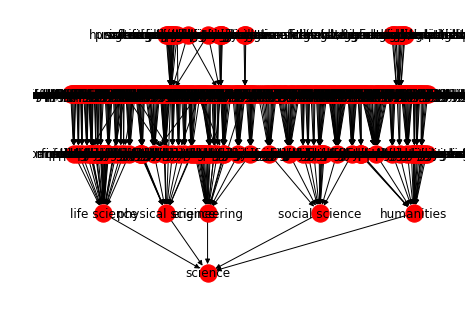

In [29]:
pos = graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)
plt.savefig('networkx_visualizations/gs_taxo_labelled.png')
plt.show()